**CUSTOMER CHURN PREDICTION**




DATASET DESCRIPTION


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
import matplotlib.ticker as mtick

In [ ]:
teleco_data = pd.read_csv('Telco-Customer-Churn.csv')
teleco_data .sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2938,5294-IMHHT,Male,0,Yes,No,53,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,One year,No,Bank transfer (automatic),97.75,5043.2,No
6318,0547-HURJB,Male,0,No,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),21.05,235.8,No
4985,4827-DPADN,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),83.30,6042.7,No
239,9227-UAQFT,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.75,284.35,No
445,7752-XUSCI,Female,0,No,No,60,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,6396.45,Yes


In [ ]:
teleco_data .shape

(7043, 21)

In [ ]:
teleco_data .columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
teleco_data .dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
teleco_data .describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


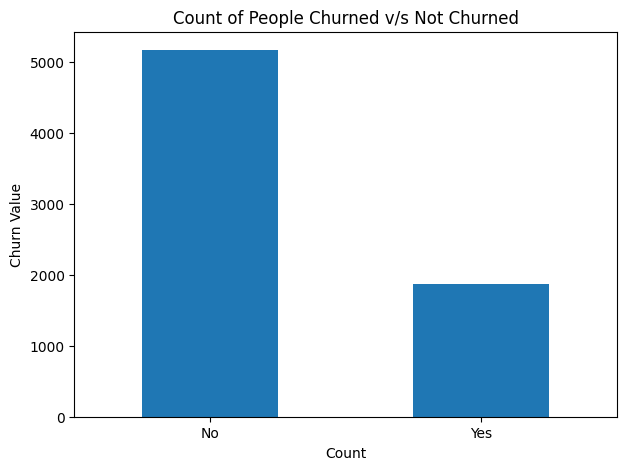

In [ ]:
teleco_data ['Churn'].value_counts().plot(kind='bar', figsize=(7,5))
plt.xlabel('Count')
plt.ylabel('Churn Value')
plt.title('Count of People Churned v/s Not Churned')
plt.xticks(rotation=0)
plt.show()



In [ ]:
(teleco_data ['Churn'].value_counts()/teleco_data .shape[0])*100

,count
Churn,
No,73.463013
Yes,26.536987


In [ ]:
teleco_data ['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
teleco_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


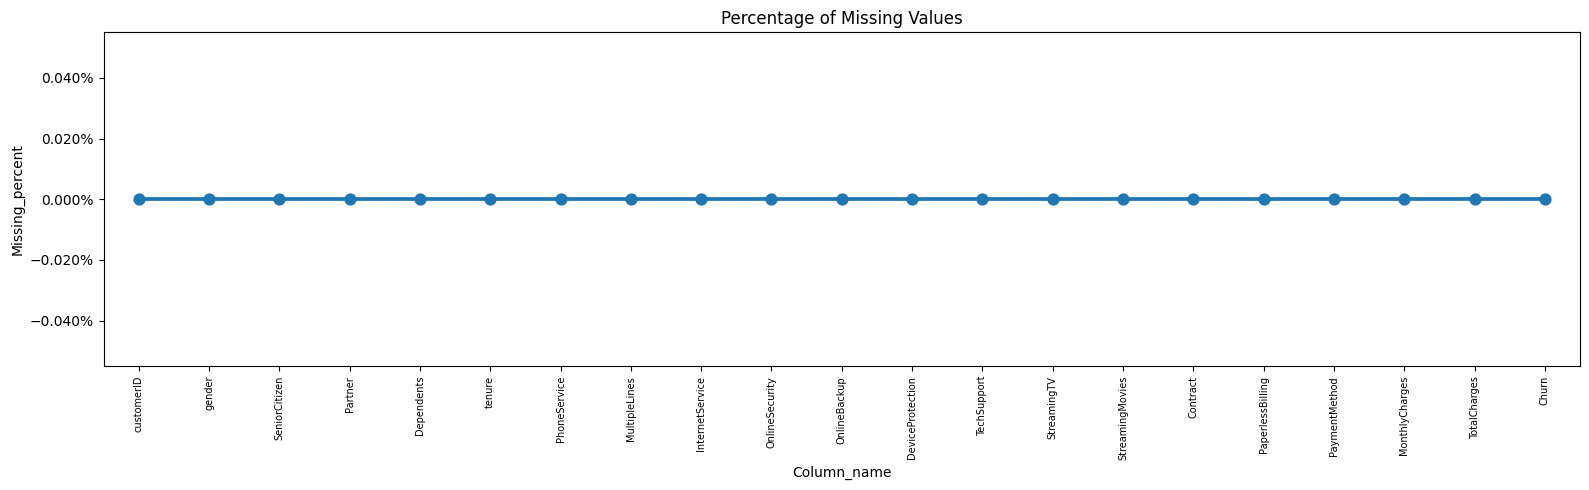

In [ ]:
missing = pd.DataFrame((teleco_data .isnull().sum()) * 100 / teleco_data .shape[0]).reset_index()
missing.columns = ['Column_name', 'Missing_percent']

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='Column_name', y='Missing_percent', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.show()

DATA CLEANING

In [ ]:
data=teleco_data.copy()

In [ ]:
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce')
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.loc[data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
data.dropna(how='any',inplace=True)

In [ ]:
print(data['tenure'].max())

72


In [ ]:
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
data['tenure_group']=pd.cut(data.tenure,range(1,80,12),right=False,labels=labels)

In [ ]:
data['tenure_group'].value_counts()

,count
tenure_group,
1-12,2175
61-72,1407
13-24,1024
25-36,832
49-60,832
37-48,762


In [ ]:
data.drop(columns=['customerID','tenure'],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


DATA EXPLORATION

UNIVARIATE ANALYSIS

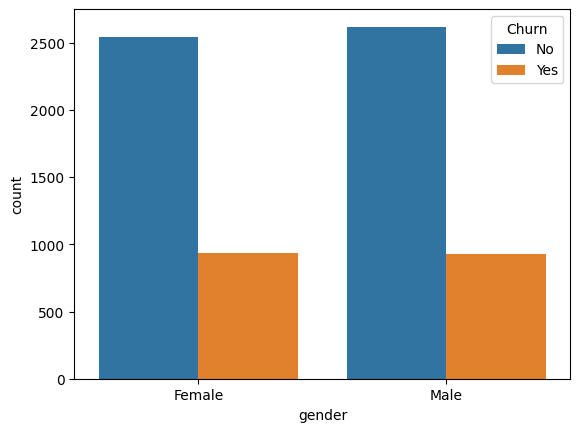

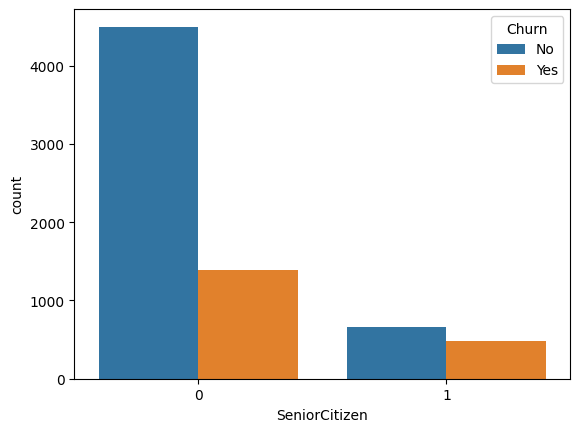

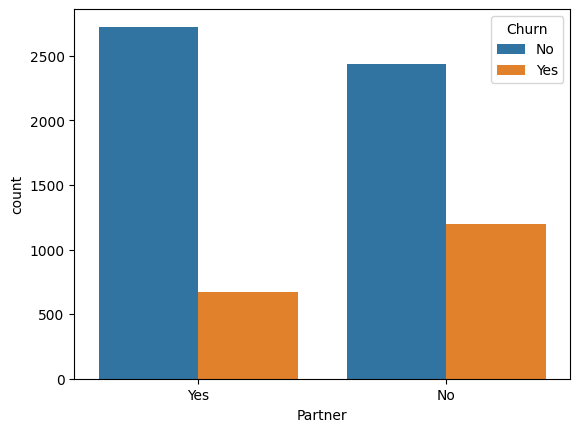

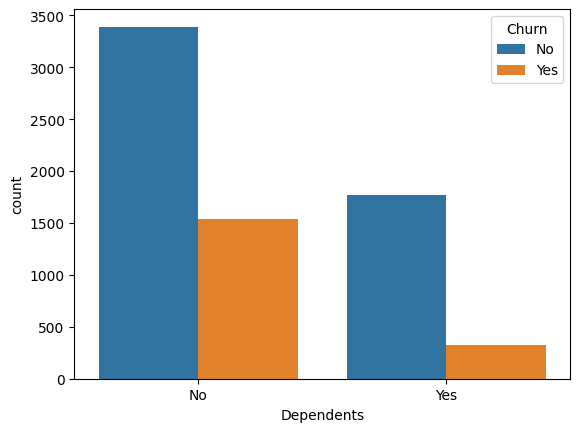

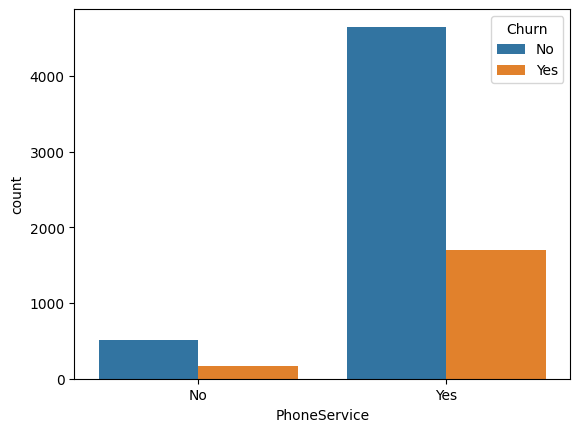

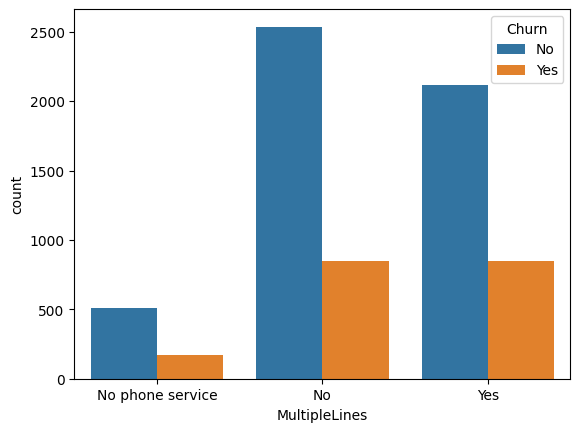

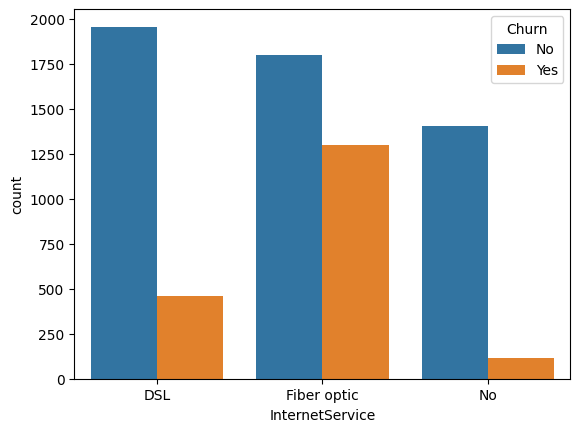

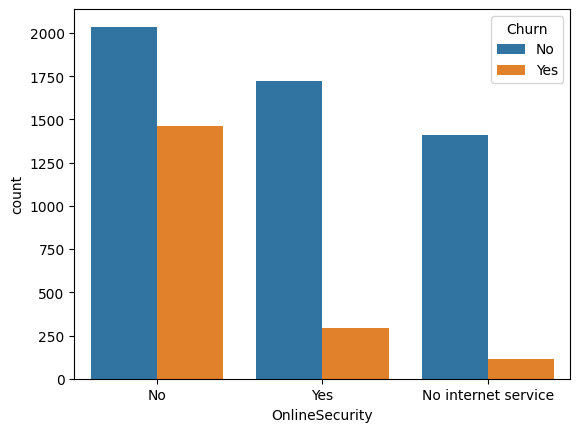

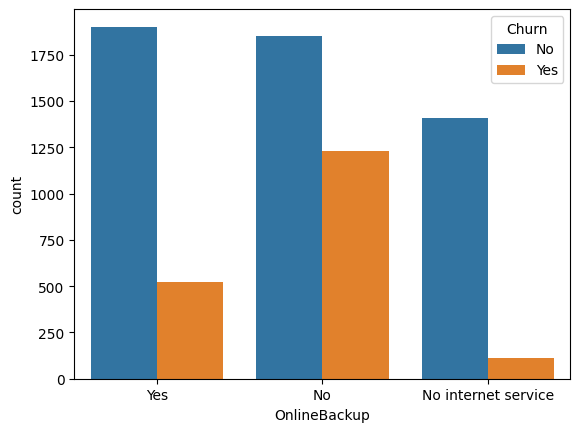

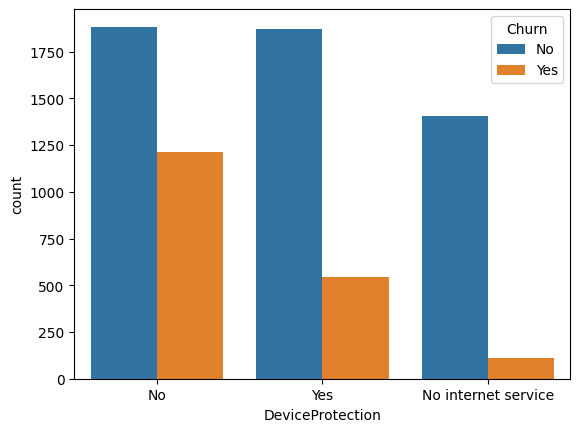

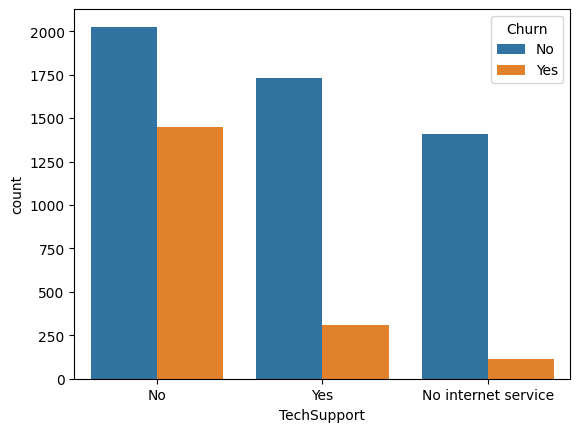

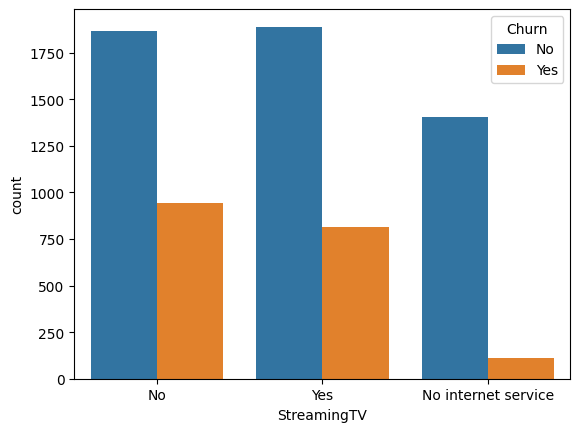

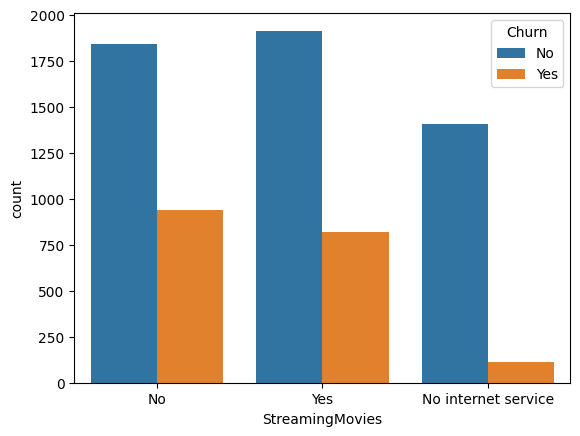

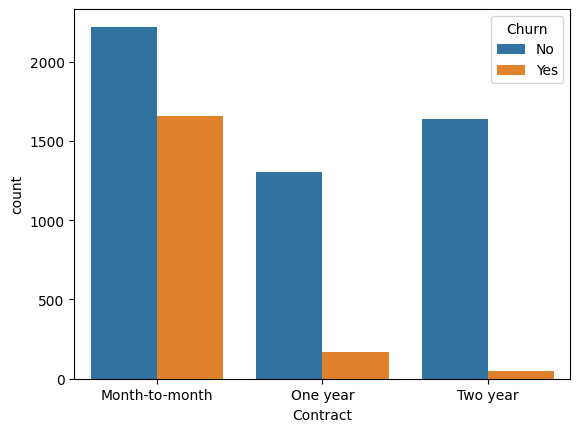

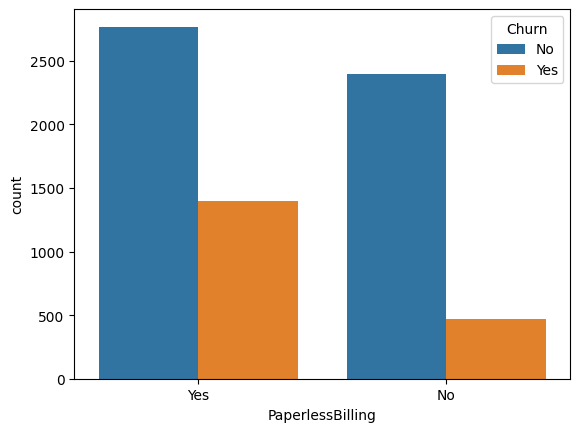

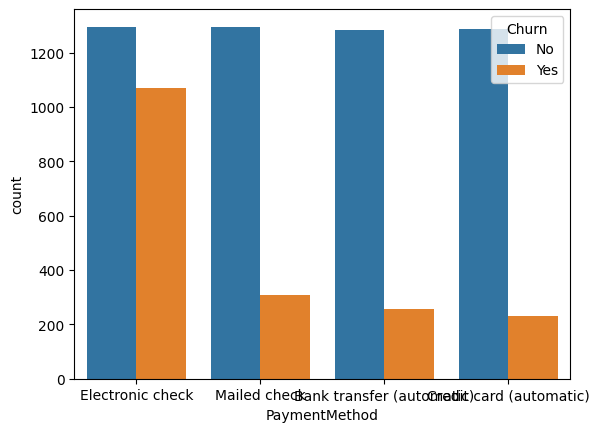

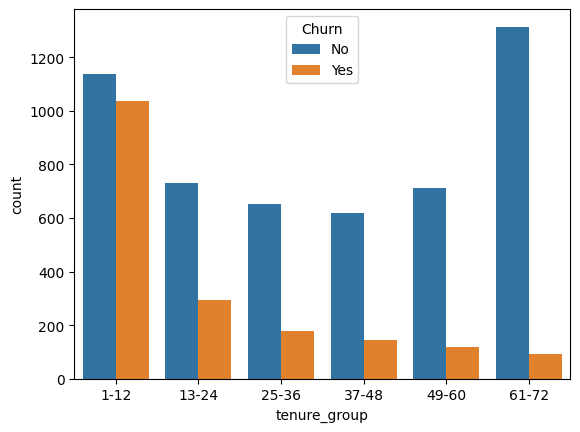

In [ ]:
for i , predictor in enumerate(data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data,x=predictor,hue='Churn')

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])


In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [ ]:
# Converting categorical variables to dummy variables
data_dummies = pd.get_dummies(data)


bool_cols = data_dummies.select_dtypes(include='bool').columns
data_dummies[bool_cols] = data_dummies[bool_cols].astype(int)
data_dummies.head()




,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


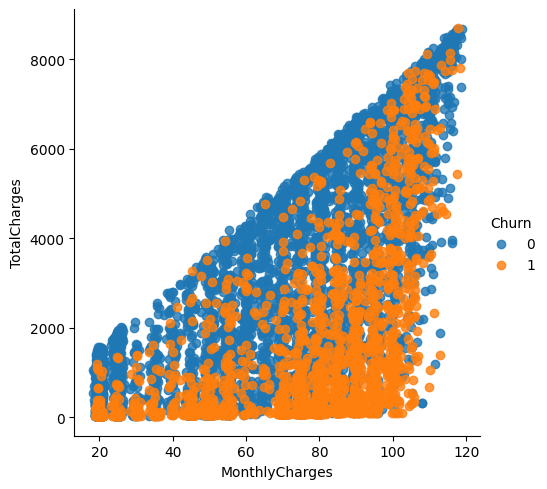

In [ ]:
sns.lmplot(data=data_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False, hue='Churn')

<ipython-input-149-d032c921fd40>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Month = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
<ipython-input-149-d032c921fd40>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Month = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges for Churn vs Non Churn')

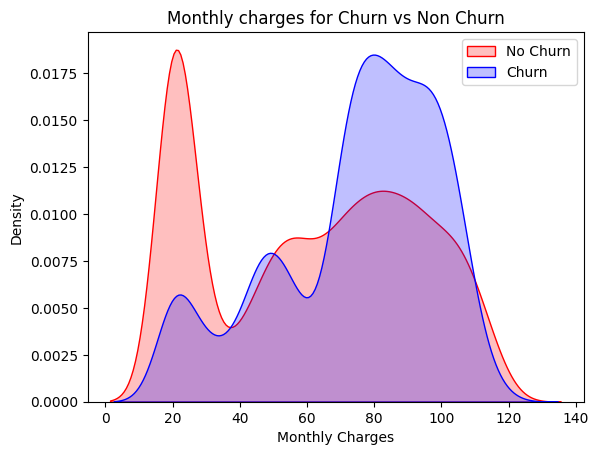

In [ ]:
Month = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Month = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],
                ax =Month, color="Blue", shade= True)
Month.legend(["No Churn","Churn"],loc='upper right')
Month.set_ylabel('Density')
Month.set_xlabel('Monthly Charges')
Month.set_title('Monthly charges for Churn vs Non Churn')

<ipython-input-150-9067a095096a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Total = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 0) ],
<ipython-input-150-9067a095096a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Total = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges for Churn vs Non Churn')

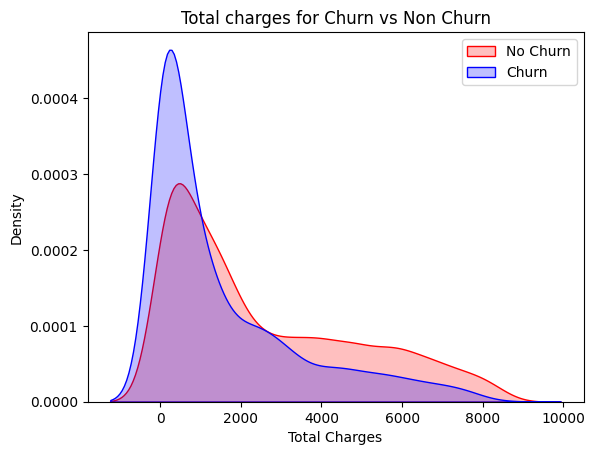

In [ ]:
Total = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Total = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 1) ],
                ax =Total, color="Blue", shade= True)
Total.legend(["No Churn","Churn"],loc='upper right')
Total.set_ylabel('Density')
Total.set_xlabel('Total Charges')
Total.set_title('Total charges for Churn vs Non Churn')

<Axes: >

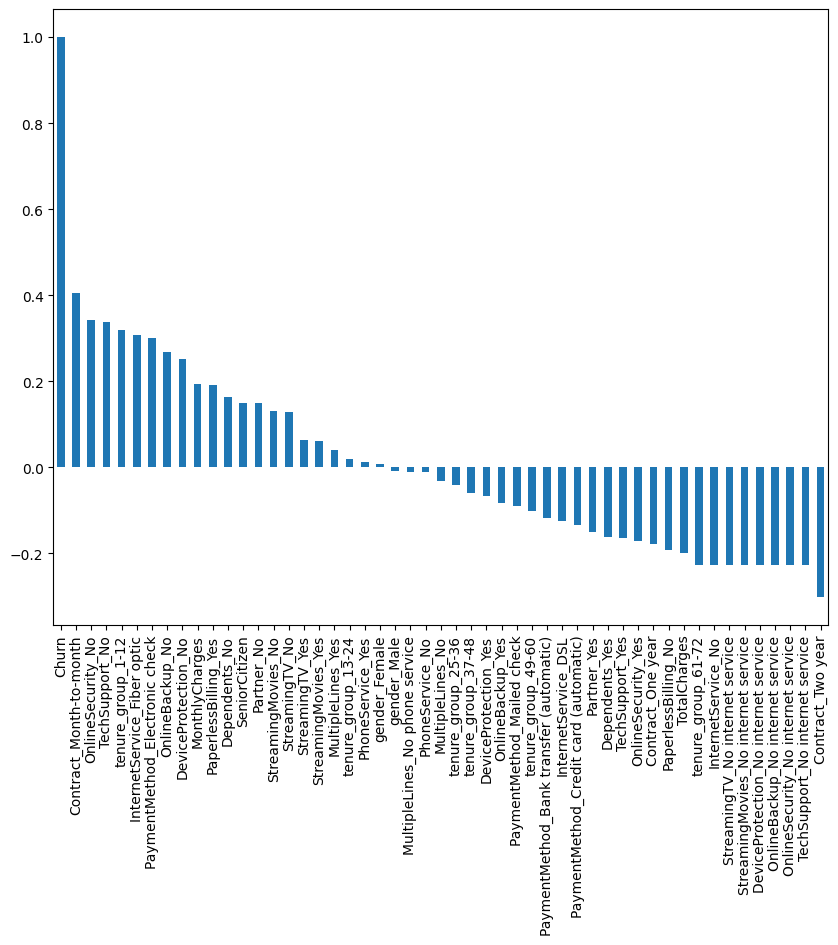

In [ ]:
plt.figure(figsize=(10,8))
data_dummies.corr ()['Churn'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

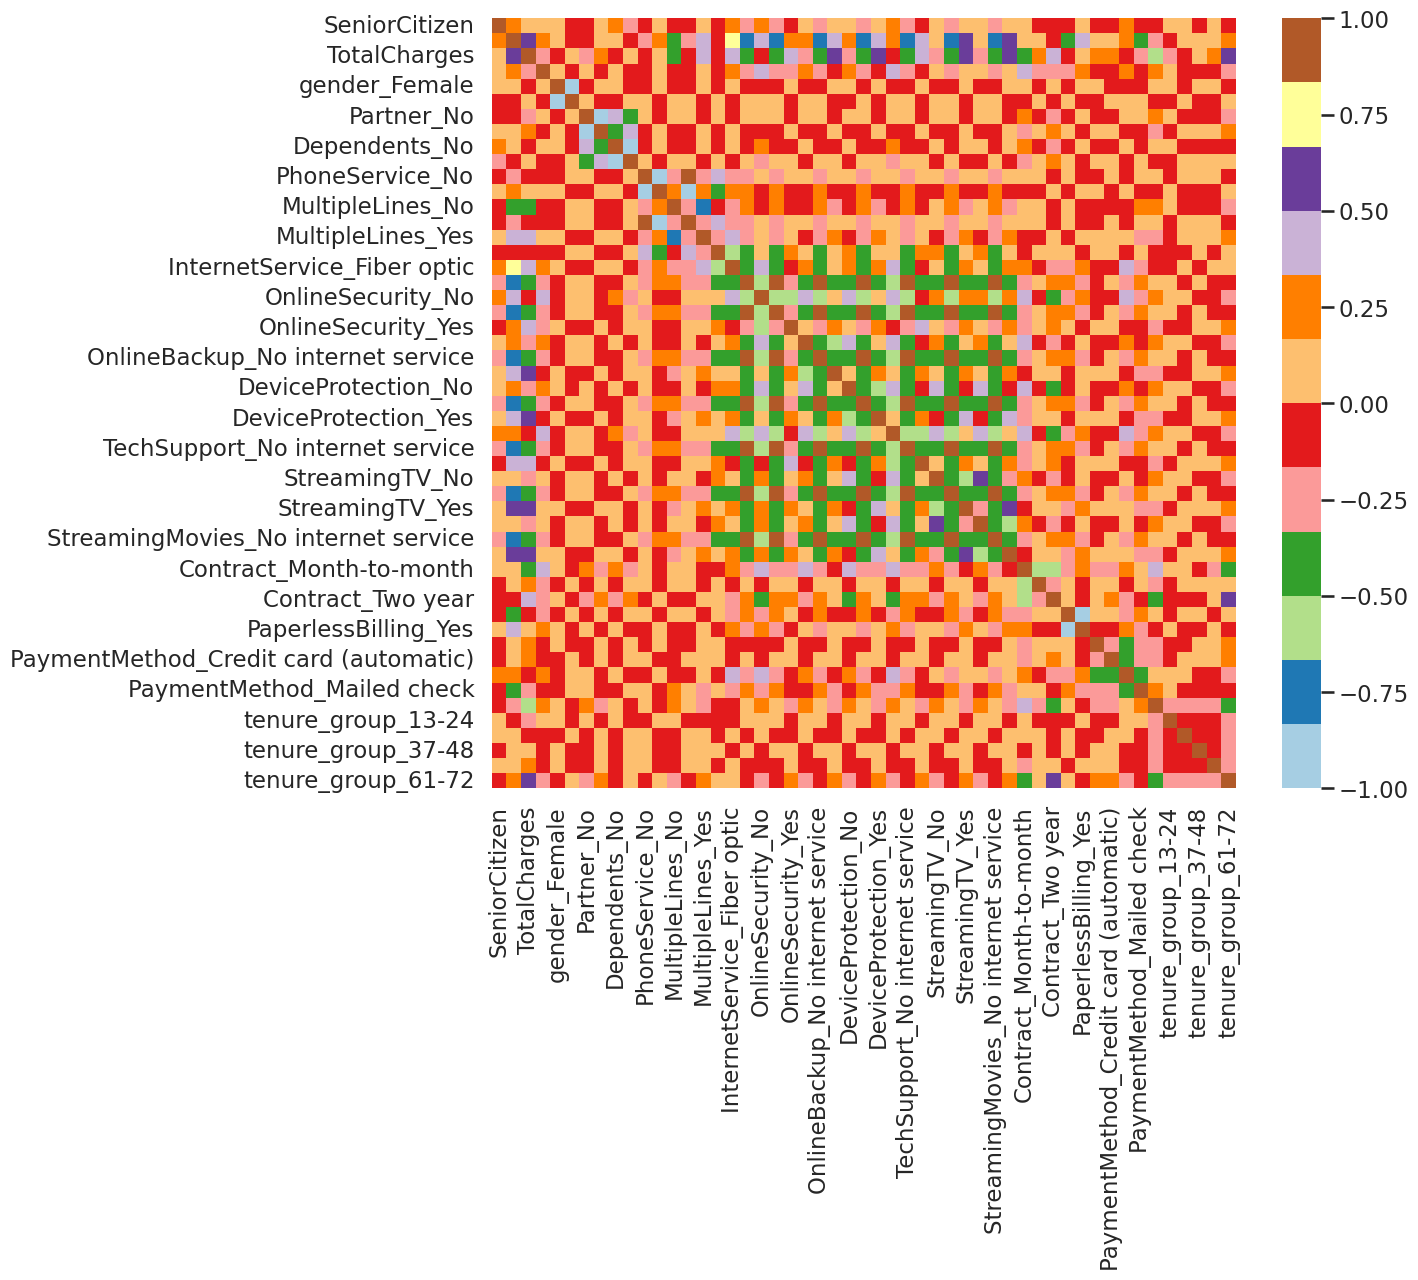

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data_dummies.corr(), cmap="Paired")

BIVARIATE ANALYSIS

In [ ]:
new_data_target0=data.loc[data['Churn']==0]
new_data_target1=data.loc[data['Churn']==1]

In [ ]:
def uniplot(df, col, title, hue=None):
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # Dynamically adjust width
    num_categories = len(df[col].unique())
    num_hue_levels = len(df[hue].unique()) if hue else 1
    width = max(10, num_categories + 2 * num_hue_levels)

    # Plot
    fig, ax = plt.subplots(figsize=(width, 4))
    plt.xticks(rotation=45)
    plt.title(title)

    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')

    # Optional: log scale only if needed
    if df[col].value_counts().max() > 100:
        plt.yscale('log')

    plt.show()


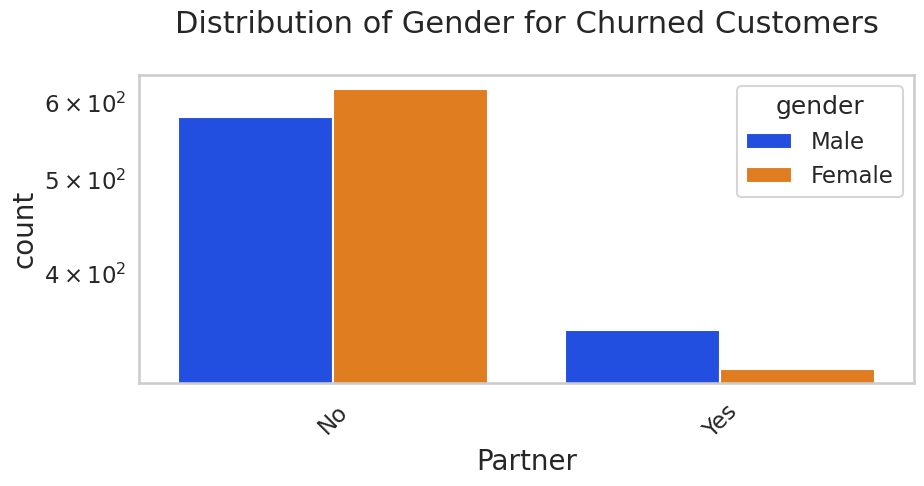

In [ ]:
uniplot(new_data_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

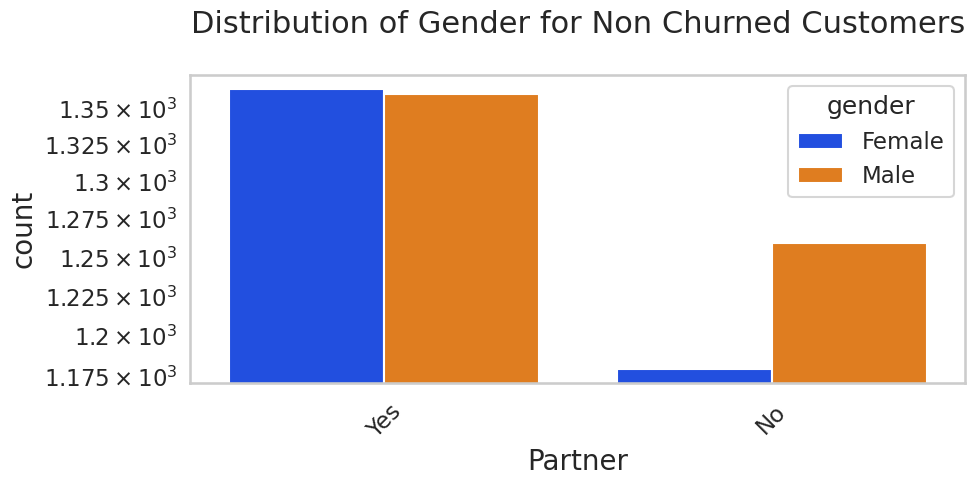

In [ ]:
uniplot(new_data_target0, col='Partner', title='Distribution of Gender for Non Churned Customers', hue='gender')

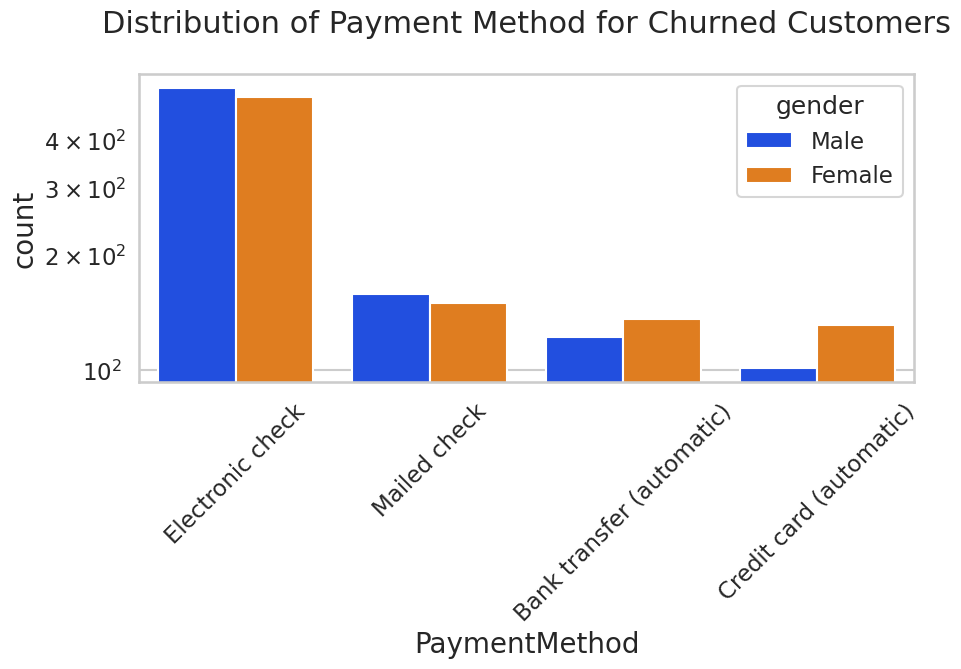

In [ ]:
uniplot(new_data_target1, col='PaymentMethod', title='Distribution of Payment Method for Churned Customers', hue='gender')

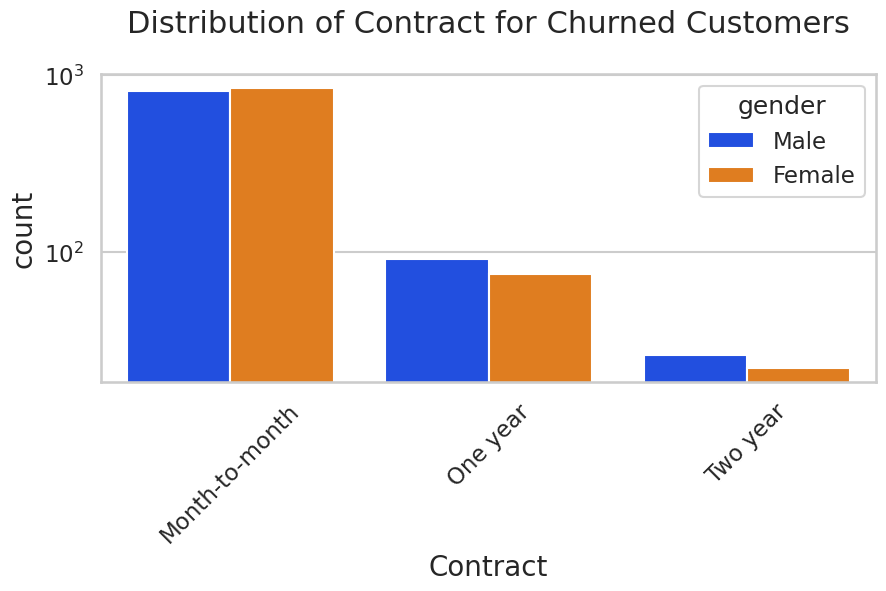

In [ ]:
uniplot(new_data_target1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')

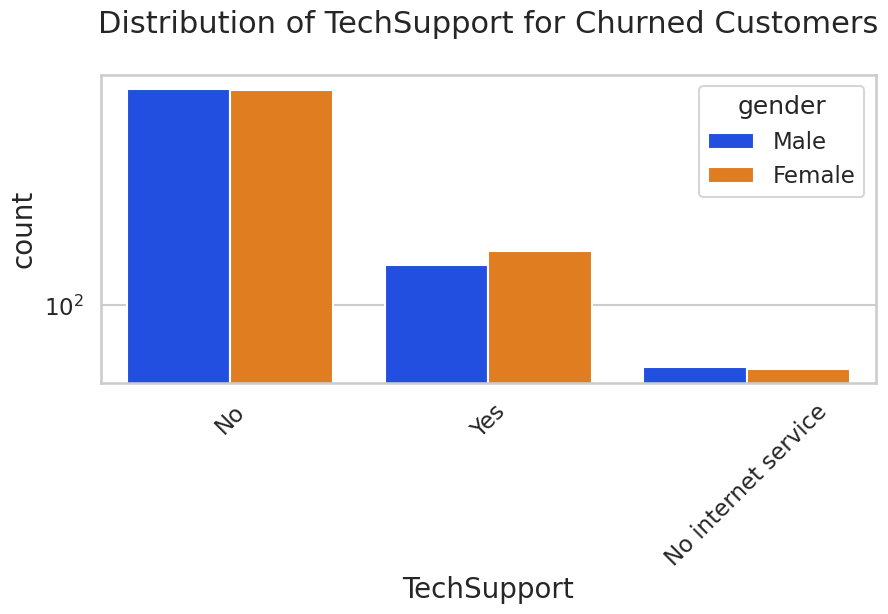

In [ ]:
uniplot(new_data_target1, col='TechSupport', title='Distribution of TechSupport for Churned Customers', hue='gender')

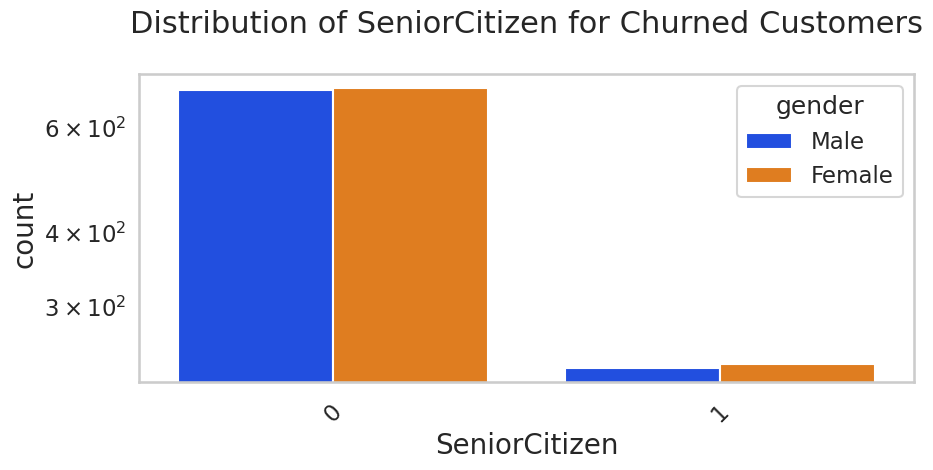

In [ ]:
uniplot(new_data_target1, col='SeniorCitizen', title='Distribution of SeniorCitizen for Churned Customers', hue='gender')

In [ ]:
data_dummies.to_csv('teleco_churn.csv')

MODEL BUILDING

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN



In [ ]:
df=pd.read_csv('teleco_churn.csv')
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
df=df.drop('Unnamed: 0',axis=1)


In [ ]:
X=df.drop('Churn',axis=1)
X

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
y=df['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
dt_model=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=5, min_samples_leaf=8)

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=dt_model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
dt_model.score(X_test,y_test)

0.7846481876332623

In [ ]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1024
           1       0.64      0.48      0.55       383

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [ ]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled,test_size=0.2)


In [ ]:
dt_model_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=5, min_samples_leaf=8)

In [ ]:
dt_model_smote.fit(Xr_train,yr_train)
yr_predict = dt_model_smote.predict(Xr_test)
dt_model_smote.score(Xr_test,yr_test)


0.9205128205128205

In [ ]:
print(classification_report(yr_test,yr_predict))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       537
           1       0.91      0.95      0.93       633

    accuracy                           0.92      1170
   macro avg       0.92      0.92      0.92      1170
weighted avg       0.92      0.92      0.92      1170



In [ ]:
print(metrics.confusion_matrix(yr_test,yr_predict))

[[476  61]
 [ 32 601]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=7)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=7, random_state=100)

In [ ]:
y_pred=rf_model.predict(X_test)
rf_model.score(X_test,y_test)

0.7981520966595593

In [ ]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1024
           1       0.68      0.49      0.57       383

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,y)

In [ ]:
Xr_train1, Xr_test1, yr_train1, yr_test1 = train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [ ]:
rf_model_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 110,max_depth=6, min_samples_leaf=8)

In [ ]:
rf_model_smote.fit(Xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=110)

In [ ]:
yr_pred1=rf_model_smote.predict(Xr_test1)
rf_model_smote.score(Xr_test1,yr_test1)

0.9405772495755518

In [ ]:
print(metrics.classification_report(yr_test1,yr_pred1))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       555
           1       0.92      0.97      0.95       623

    accuracy                           0.94      1178
   macro avg       0.94      0.94      0.94      1178
weighted avg       0.94      0.94      0.94      1178



In [ ]:
print(metrics.confusion_matrix(yr_test1,yr_pred1))

[[505  50]
 [ 20 603]]


APPLYING FEATURE SELECTION USING IMPORTANT FEATURES


In [ ]:
from sklearn.metrics import accuracy_score


importances = rf_model_smote.feature_importances_
feature_names = Xr_train1.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

# Deleted 7 least important features
top_n = 43
top_features = feature_importance_df['Feature'].head(top_n).tolist()

Xr_train_top = Xr_train1[top_features]
Xr_test_top = Xr_test1[top_features]

rf_top = RandomForestClassifier(random_state=42)
rf_top.fit(Xr_train_top, yr_train1)


y_pred_all = rf_model_smote.predict(Xr_test1)
y_pred_top = rf_top.predict(Xr_test_top)

print("Accuracy with all features:", accuracy_score(yr_test1, y_pred_all))
print("Accuracy with top", top_n, "features:", accuracy_score(yr_test1, y_pred_top))


Feature Importances:
                                     Feature  Importance
35                  Contract_Month-to-month    0.129441
37                        Contract_Two year    0.097106
44                        tenure_group_1-12    0.087797
2                              TotalCharges    0.084919
15              InternetService_Fiber optic    0.052269
26                           TechSupport_No    0.049631
1                            MonthlyCharges    0.043547
49                       tenure_group_61-72    0.038460
33      StreamingMovies_No internet service    0.034393
36                        Contract_One year    0.033241
14                      InternetService_DSL    0.032189
19                       OnlineSecurity_Yes    0.031223
21         OnlineBackup_No internet service    0.028092
28                          TechSupport_Yes    0.026576
16                       InternetService_No    0.025701
18       OnlineSecurity_No internet service    0.024607
27          TechSupport_No

APPLYING FEATURE EXTRACTION USING PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.9)
xr_train_pca=pca.fit_transform(Xr_train1)
xr_test_pca=pca.transform(Xr_test1)
explained_variance=pca.explained_variance_ratio_


In [ ]:

rf_pca = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 105,max_depth=6, min_samples_leaf=7)
rf_pca.fit(xr_train_pca,yr_train1)
yr_pred_pca=rf_pca.predict(xr_test_pca)

In [ ]:
rf_pca.score(xr_test_pca,yr_test1)

0.7198641765704584

In [ ]:
print(classification_report(yr_test1,yr_pred_pca))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       555
           1       0.70      0.83      0.76       623

    accuracy                           0.72      1178
   macro avg       0.73      0.71      0.71      1178
weighted avg       0.73      0.72      0.72      1178



In [ ]:
import pickle

In [ ]:
filename='teleco_churn_model.pkl'
pickle.dump(rf_model_smote,open(filename,'wb'))

In [ ]:
load_model=pickle.load(open(filename,'rb'))

In [ ]:
load_model.score(Xr_test1,yr_test1)

0.9405772495755518